# Manifold learning Embedding

SEOYEON CHOI  
2023-05-20

> Expectation Maximization

참고:
[LocallyLinearEmbedding](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html),
[t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE),
[머신러닝
도감](http://www.yes24.com/Product/Goods/84809164?pid=123487&cosemkid=go15760589536554250&gclid=CjwKCAjw36GjBhAkEiwAKwIWycfq1GuEe4xEi2QH73V1JvmypOej-HI910PEa5K8AJ7_5hsiTefiIBoCUAYQAvD_BwE),
[sklean](https://scikit-learn.org/stable/auto_examples/manifold/plot_swissroll.html#sphx-glr-auto-examples-manifold-plot-swissroll-py)

> **Note**
>
> 비선형 데이터의 차원 축소 방법을 매니폴드 학습이라고 한다.

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# LocallyLinearEmbedding

국소 선형 임베딩 Local Linearn Embedding = LLE

; 높은 차원 공간에서 휘어지거나 뒤틀린 구조를 낮은 차원 공간에 단순한
구조로 나타내는 알고리즘

-   주성분 분석은 변수 사이에 상관관계가 있는 데이터에 적용하는
    알고리즘이므로 스위스 롤 같은 비선형 데이터를 차원 축소할 때는 국소
    선형 임베딩이 더 적합하다.

*국소 선형 임베딩은 근처에 있는 점 개수가 결과에 주는 영향이 크다.*

## Algorithm

1.  데이터 포인트 $x_i$ 근처에 있는 점($k$개)을 찾는다.
2.  근처에 있는 $K$개 점의 선형 결합으로 $x_i$를 재구성하는 가중치
    $W_{ij}$를 계산한다.
3.  가중치 $W_{ij}$로 낮은 차원($d$차원)의 $y_i$를 계산한다.

In [58]:
import sklearn.datasets # 이제 sklearn에서 samples_generator없음
from sklearn.manifold import LocallyLinearEmbedding

In [59]:
data, color = sklearn.datasets.make_swiss_roll(n_samples=1500)

In [60]:
data.shape

(1500, 3)

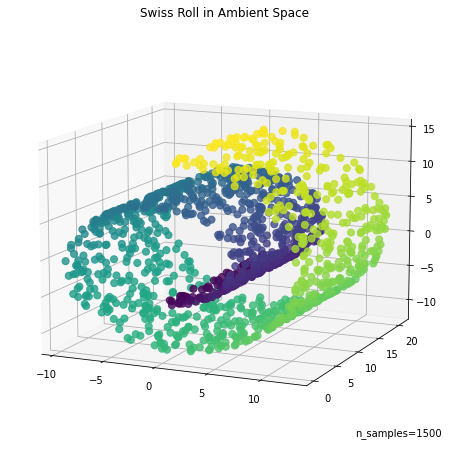

In [61]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    data[:, 0], data[:, 1], data[:, 2], c=color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

In [62]:
n_neighbors = 12 # 근처에 있는 점 개수

In [63]:
n_components = 2 # 차원 축소 후 차원 수

In [64]:
# 국소 선형 임베딩 모델 설정
model = LocallyLinearEmbedding(n_neighbors = n_neighbors,
                               n_components = n_components)

In [65]:
model.fit(data) # 학습

LocallyLinearEmbedding(n_neighbors=12) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LocallyLinearEmbedding LocallyLinearEmbedding(n_neighbors=12)

In [66]:
print(model.transform(data)) # 차원 축소한 데이터 출력

[[ 0.010313   -0.02643186]
 [-0.01607846 -0.01272895]
 [ 0.00912732  0.02124591]
 ...
 [ 0.03685466 -0.08256278]
 [ 0.00095445  0.00296153]
 [-0.00527724 -0.00157992]]

In [67]:
lle = model.transform(data)

In [68]:
model_5 = LocallyLinearEmbedding(n_neighbors = 5,
                               n_components = n_components)

In [69]:
model_5.fit(data) # 학습

LocallyLinearEmbedding() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LocallyLinearEmbedding LocallyLinearEmbedding()

In [70]:
lle_5 = model_5.transform(data)

In [71]:
model_50 = LocallyLinearEmbedding(n_neighbors = 50,
                               n_components = n_components)

In [72]:
model_50.fit(data) # 학습

LocallyLinearEmbedding(n_neighbors=50) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LocallyLinearEmbedding LocallyLinearEmbedding(n_neighbors=50)

In [73]:
lle_50 = model_50.transform(data)

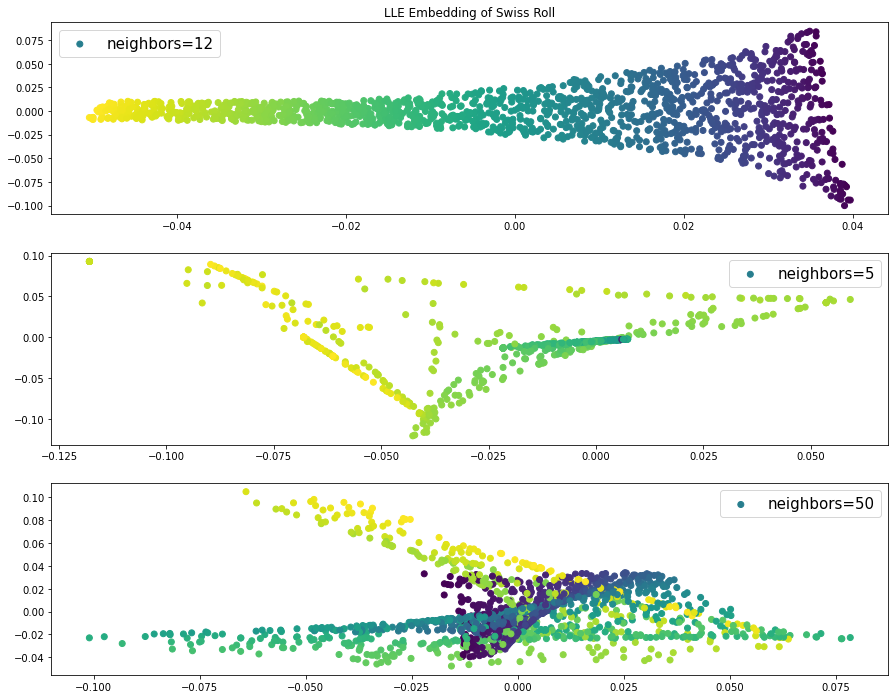

In [77]:
fig, ax = plt.subplots(figsize=(15, 12), nrows=3)
ax[0].scatter(lle[:, 0], lle[:, 1], c=color, label = 'neighbors=12')
ax[0].legend(fontsize=15)
ax[0].set_title("LLE Embedding of Swiss Roll")
ax[1].scatter(lle_5[:, 0], lle_5[:, 1], c=color, label = 'neighbors=5')
ax[1].legend(fontsize=15)
ax[2].scatter(lle_50[:, 0], lle_50[:, 1], c=color, label = 'neighbors=50')
ax[2].legend(fontsize=15)

-   근처에 있는 점이 5개라면 숨어 있는 낮은 차원의 데이터 구조를 꺼낼 수
    없으므로 차우너 축소 후 점들이 좁은 범위에 모여 있다. 따라서 넓은
    범위의 데이터 정보를 알 수 없다.
-   근처에 있는 점이 50개라면 색깔이 다른 점이 근처에 있다. 근처에 있는
    점 개수가 너무 많아서 일부 범위의 데이터 구조를 파악할 수 없다.

# t-SNE

t-분포 확률적 임베딩(t-distributed stochastic neighbor embedding = t-SNE

; 높은 차원의 복잡한 데이터를 2차원(또는 입체)에 차원 축소하는 방법,
낮은 차원 공간의 시각화에 사용

-   t-분포 확률적 임베딩으로 차원을 축소할 때는 자유도 1의 t분포를
    이용한다는 특성
    -   t-분포를 이용하면 높은 차원 공간에서 비슷한 데이터 구조는 낮은
        차원 공간에서 가깝게 대응하며, 비슷하지 않은 데이터 구조는 멀리
        떨어져 대응한다.

## Algorithm

1.  모든 $i,j$ 쌍에 관한 $x_i, x_j$의 유사도를 가우스 분포를 이용한
    유사도로 나타낸다.
2.  $x_i$와 같은 개수의 점 $y_i$를 낮은 차원 공간에 무작위로 배치하고,
    모든 $i,j$쌍에 관한 $y_i,y_j$의 유사도를 t분포를 이용해 나타낸다.
3.  1과 2에서 정의한 유사도 분포가 가능하면 같도록 데이터 포인트 $y_i$를
    갱신한다.
4.  수렴 조건까지 과정 3을 반복한다.

-   *t분포는 헤비테일분포[1]이므로 높은 차원 공간에서는 중심에서 먼
    부분의 비중이 높다.*
-   *따라서 일부분의 정보를 유지하기 어려워 4차원 이상의 공간은 차원
    축소가 제대로 되지 않을 수 있다.*

[1] heavy-tailed distribution, 일반적인 정규분포보다 끝단의 값이 두터운
분포

In [144]:
import sklearn.datasets
from sklearn.manifold import TSNE

In [145]:
# 필기체 숫자 이미지 데이터세트 불러오기
data = sklearn.datasets.load_digits()

In [146]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [147]:
data['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [148]:
np.array(data['data']).shape

(1797, 64)

In [149]:
# 2차원으로 차원 축소
n_components = 2

In [150]:
# t-분포 확률적 임베딩 모델 생성
model = TSNE(n_components = n_components)

In [151]:
# 특징으로 학습한 2차원 공간 값 출력
print(model.fit_transform(data.data))

[[ -2.8487089  53.309692 ]
 [ 10.247521  -12.026601 ]
 [-14.381865  -19.028639 ]
 ...
 [ -6.171889  -11.055643 ]
 [-21.39586    15.081427 ]
 [-14.349473   -7.253504 ]]

In [152]:
tsne = model.fit_transform(data.data)

Text(0.5, 1.0, 't-SNE Embedding of the UCI ML hand-written digits')

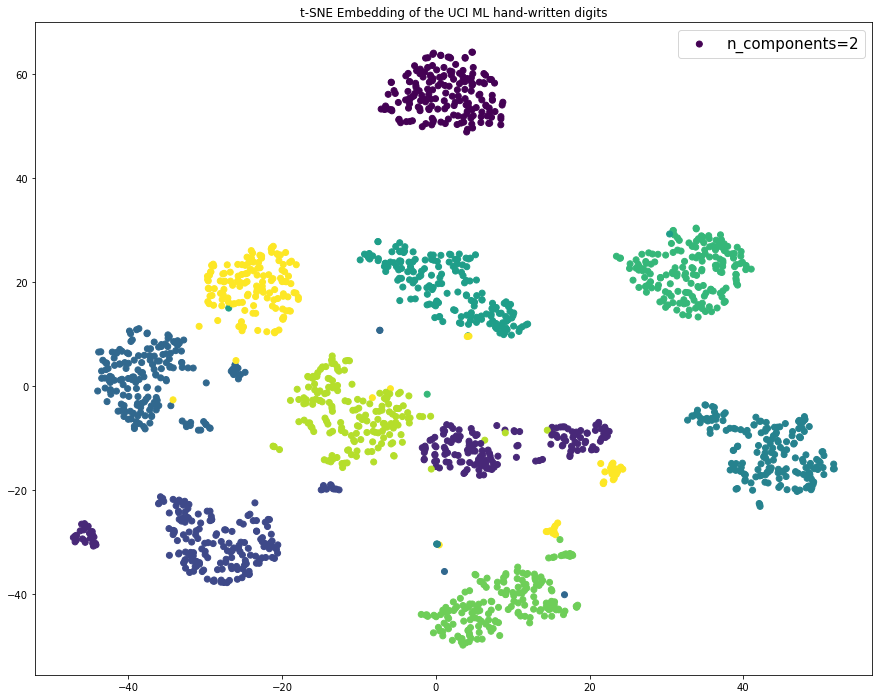

In [153]:
fig, ax = plt.subplots(figsize=(15, 12), nrows=1)
ax.scatter(tsne[:, 0], tsne[:, 1],c=data.target,label = 'n_components=2')
ax.legend(fontsize=15)
ax.set_title("t-SNE Embedding of the UCI ML hand-written digits")

# Comparison LLE vs TSNE vs PCA

In [154]:
model_local = LocallyLinearEmbedding(n_neighbors = 10,
                               n_components = n_components)

In [155]:
model_local.fit(data['data']) # 학습

LocallyLinearEmbedding(n_neighbors=10) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LocallyLinearEmbedding LocallyLinearEmbedding(n_neighbors=10)

In [156]:
lle_local = model_local.transform(data['data'])

In [157]:
tsne

array([[ -3.0844698,  55.6635   ],
       [ 10.543986 , -11.4791155],
       [-13.688778 , -18.927315 ],
       ...,
       [ -5.8162694, -11.081288 ],
       [-20.832987 ,  15.000697 ],
       [-14.033677 ,  -7.263176 ]], dtype=float32)

In [158]:
from sklearn.decomposition import PCA

In [159]:
model_pca = PCA(n_components=2)

In [160]:
model_pca = modle_pca.fit(data.data)

In [161]:
pca = model_pca.transform(data.data)

Text(0.5, 1.0, 'PCA Embedding of the UCI ML hand-written digits')

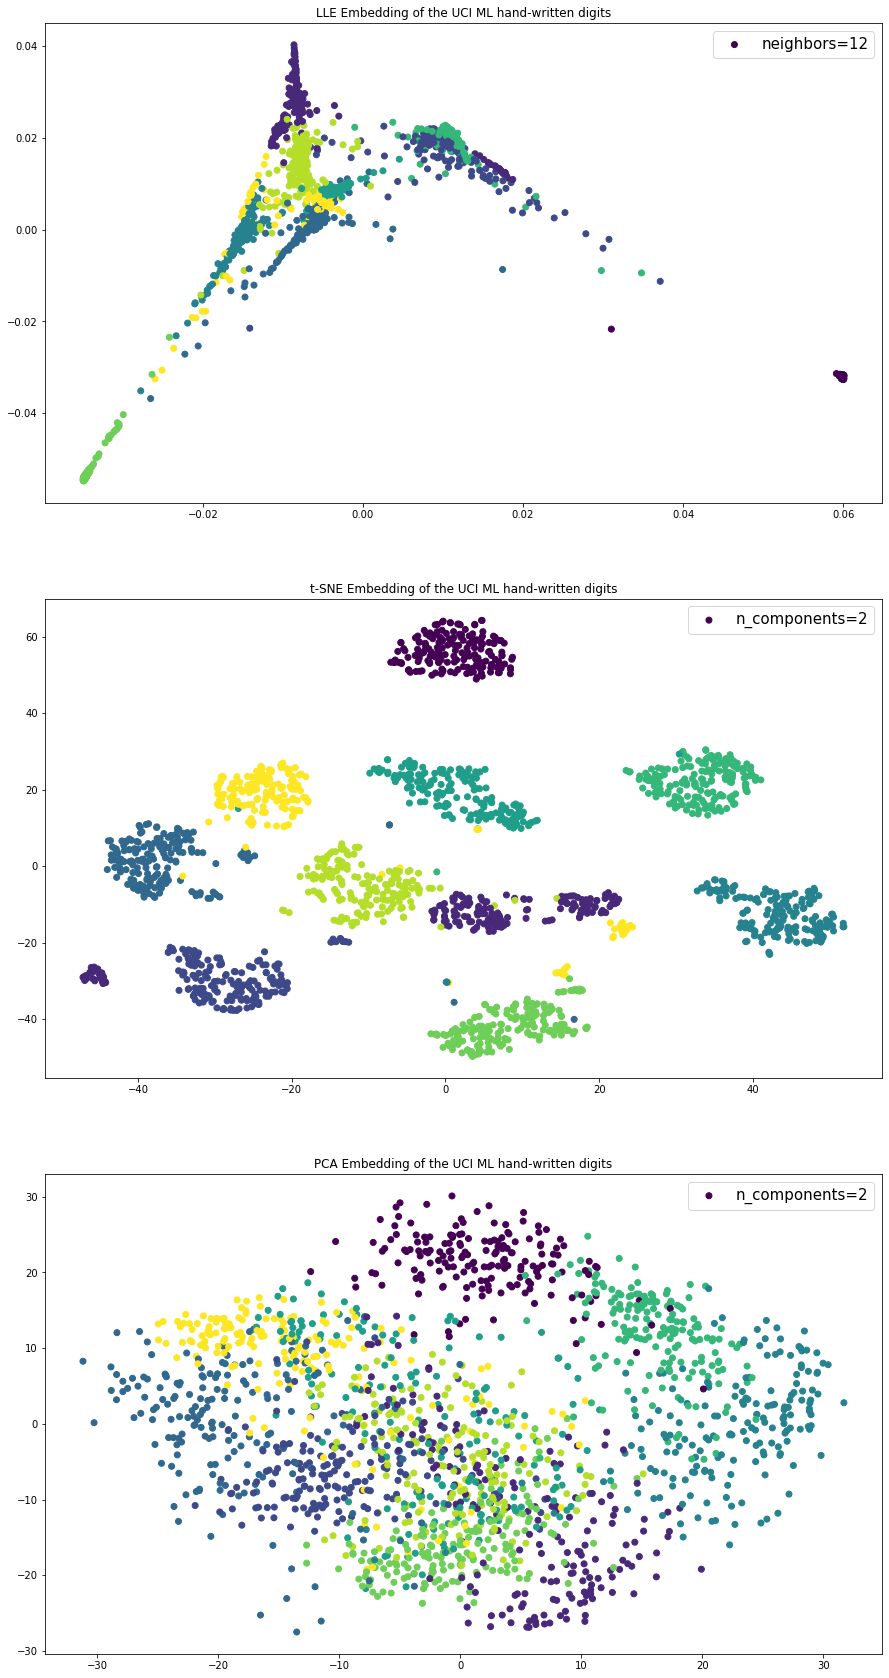

In [162]:
fig, ax = plt.subplots(figsize=(15, 30), nrows=3)
ax[0].scatter(lle_local[:, 0], lle_local[:, 1], c=data.target, label = 'neighbors=12')
ax[0].legend(fontsize=15)
ax[0].set_title("LLE Embedding of the UCI ML hand-written digits")
ax[1].scatter(tsne[:, 0], tsne[:, 1],c=data.target,label = 'n_components=2')
ax[1].legend(fontsize=15)
ax[1].set_title("t-SNE Embedding of the UCI ML hand-written digits")
ax[2].scatter(pca[:, 0], pca[:, 1],c=data.target,label = 'n_components=2')
ax[2].legend(fontsize=15)
ax[2].set_title("PCA Embedding of the UCI ML hand-written digits")